In [1]:
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset

In [2]:
batch_size = 32

In [3]:
filename = 'splitted_dataset_2.npz'
dataset = np.load(filename)

In [4]:
inputs_test_1 = dataset['inputs_test_1']
cleans_test_1 = dataset['cleans_test_1']
labels_test_1 = dataset['labels_test_1']

In [5]:
class AutoEncoder_dataset(Dataset):
    def __init__(self, inputs, cleans):
        self.inputs = torch.from_numpy(inputs).float()
        self.cleans = torch.from_numpy(cleans).float()
    
    def __getitem__(self, index):
        inputs = self.inputs[index]
        cleans = self.cleans[index]
        return inputs, cleans
    
    def __len__(self):
        return len(self.inputs)

In [6]:
test_set  = AutoEncoder_dataset(inputs = inputs_test_1,
                                cleans = cleans_test_1)

In [7]:
test_loader = DataLoader(dataset=test_set,
                         batch_size=batch_size,
                         shuffle=False,
                         drop_last=False)

In [8]:
class SegNet(nn.Module):
    
    def __init__(self):
        super(SegNet, self).__init__()
        
        # Encoder
        
        self.Enc_0_1 = nn.Sequential(
            nn.Conv2d(in_channels=2, out_channels=64, kernel_size=3, padding=1),
            nn.BatchNorm2d(num_features=64),
            nn.ReLU(inplace=True)
        )
        
        self.Enc_1_1 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.BatchNorm2d(num_features=128),
            nn.ReLU(inplace=True)
        )
        
        self.Enc_2_1 = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels= 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(num_features=256),
            nn.ReLU(inplace=True)
        )
        
        self.Enc_2_2 = nn.Sequential(
            nn.Conv2d(in_channels=256, out_channels= 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(num_features=256),
            nn.ReLU(inplace=True)
        )
        
        self.Enc_3_1 = nn.Sequential(
            nn.Conv2d(in_channels=256, out_channels= 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(num_features=512),
            nn.ReLU(inplace=True)
        )
        
        self.Enc_3_2 = nn.Sequential(
            nn.Conv2d(in_channels=512, out_channels= 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(num_features=512),
            nn.ReLU(inplace=True)
        )
        
        self.Enc_4_1 = nn.Sequential(
            nn.Conv2d(in_channels=512, out_channels= 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(num_features=512),
            nn.ReLU(inplace=True)
        )
        
        self.Enc_4_2 = nn.Sequential(
            nn.Conv2d(in_channels=512, out_channels= 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(num_features=512),
            nn.ReLU(inplace=True)
        )
        
        self.Pool = nn.MaxPool2d(kernel_size=2, stride=2, return_indices=True)
        
        # Decoder
        
        self.Dec_4_2 = nn.Sequential(
            nn.ConvTranspose2d(in_channels=512, out_channels=512, kernel_size=3, padding=1),
            nn.BatchNorm2d(num_features=512),
            nn.ReLU(inplace=True)
        )
        
        self.Dec_4_1 = nn.Sequential(
            nn.ConvTranspose2d(in_channels=512, out_channels=512, kernel_size=3, padding=1),
            nn.BatchNorm2d(num_features=512),
            nn.ReLU(inplace=True)
        )
        
        self.Dec_3_2 = nn.Sequential(
            nn.ConvTranspose2d(in_channels=512, out_channels=512, kernel_size=3, padding=1),
            nn.BatchNorm2d(num_features=512),
            nn.ReLU(inplace=True)
        )
        
        self.Dec_3_1 = nn.Sequential(
            nn.ConvTranspose2d(in_channels=512, out_channels=256, kernel_size=3, padding=1),
            nn.BatchNorm2d(num_features=256),
            nn.ReLU(inplace=True)
        )
        
        self.Dec_2_2 = nn.Sequential(
            nn.ConvTranspose2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.BatchNorm2d(num_features=256),
            nn.ReLU(inplace=True)
        )
        
        self.Dec_2_1 = nn.Sequential(
            nn.ConvTranspose2d(in_channels=256, out_channels=128, kernel_size=3, padding=1),
            nn.BatchNorm2d(num_features=128),
            nn.ReLU(inplace=True)
        )
        
        self.Dec_1_1 = nn.Sequential(
            nn.ConvTranspose2d(in_channels=128, out_channels=64, kernel_size=3, padding=1),
            nn.BatchNorm2d(num_features=64),
            nn.ReLU(inplace=True)
        )
        
        self.Dec_0_1 = nn.Sequential(
            nn.ConvTranspose2d(in_channels=64, out_channels=2, kernel_size=3, padding=1),
            nn.BatchNorm2d(num_features=2),
            nn.ReLU(inplace=True)
        )
        
        self.Unpool = nn.MaxUnpool2d(kernel_size=2, stride=2)
        
        
    def forward(self, inputs):
        
        # Encoder
        
        dim_0 = inputs.size()
        outputs = self.Enc_0_1(inputs)
        outputs, indice_0 = self.Pool(outputs)
        
        dim_1 = outputs.size()
        outputs = self.Enc_1_1(outputs)
        outputs, indice_1 = self.Pool(outputs)
        
        dim_2 = outputs.size()
        outputs = self.Enc_2_1(outputs)
        outputs = self.Enc_2_2(outputs)
        outputs, indice_2 = self.Pool(outputs)
        
        dim_3 = outputs.size()
        outputs = self.Enc_3_1(outputs)
        outputs = self.Enc_3_2(outputs)
        outputs, indice_3 = self.Pool(outputs)
        
        dim_4 = outputs.size()
        outputs = self.Enc_4_1(outputs)
        outputs = self.Enc_4_2(outputs)
        outputs, indice_4 = self.Pool(outputs)
        
        dim_middle = outputs.size()
        
        # Decoder
        outputs = self.Unpool(outputs, indice_4, output_size=dim_4)
        outputs = self.Dec_4_2(outputs)
        outputs = self.Dec_4_1(outputs)
        dim_4d = outputs.size()
        
        outputs = self.Unpool(outputs, indice_3, output_size=dim_3)
        outputs = self.Dec_3_2(outputs)
        outputs = self.Dec_3_1(outputs)
        dim_3d = outputs.size()
        
        outputs = self.Unpool(outputs, indice_2, output_size=dim_2)
        outputs = self.Dec_2_2(outputs)
        outputs = self.Dec_2_1(outputs)
        dim_2d = outputs.size()
        
        outputs = self.Unpool(outputs, indice_1, output_size=dim_1)
        outputs = self.Dec_1_1(outputs)
        dim_1d = outputs.size()
        
        outputs = self.Unpool(outputs, indice_0, output_size=dim_0)
        outputs = self.Dec_0_1(outputs)
        dim_0d = outputs.size()
        
        return outputs
        

In [9]:
GPU_NUM = 6
device = torch.device(f'cuda:{GPU_NUM}' if torch.cuda.is_available() else 'cpu')
torch.cuda.set_device(device)
print('Currernt cuda device ', torch.cuda.current_device())

if device.type == 'cuda':
    print(torch.cuda.get_device_name(GPU_NUM))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(GPU_NUM)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_cached(GPU_NUM)/1024**3,1), 'GB')

Currernt cuda device  6
GeForce RTX 2080 Ti
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB


In [10]:
net = SegNet().to(device)

In [11]:
PATH = 'SegNet.pt'

In [12]:
checkpoint = torch.load(PATH, map_location=device)
net.load_state_dict(checkpoint['State_dict'])

<All keys matched successfully>

In [13]:
outputs_test = torch.FloatTensor(1, 2, 257, 382)

net.eval()

with torch.no_grad():
    for data in test_loader:
        inputs, _ = data
        inputs = inputs.to(device)
        outputs = net(inputs)
        outputs_test = torch.cat((outputs_test, outputs.to('cpu')), 0)

outputs_test = outputs_test[1:]

In [14]:
import matplotlib.pyplot as plt

Index :  98


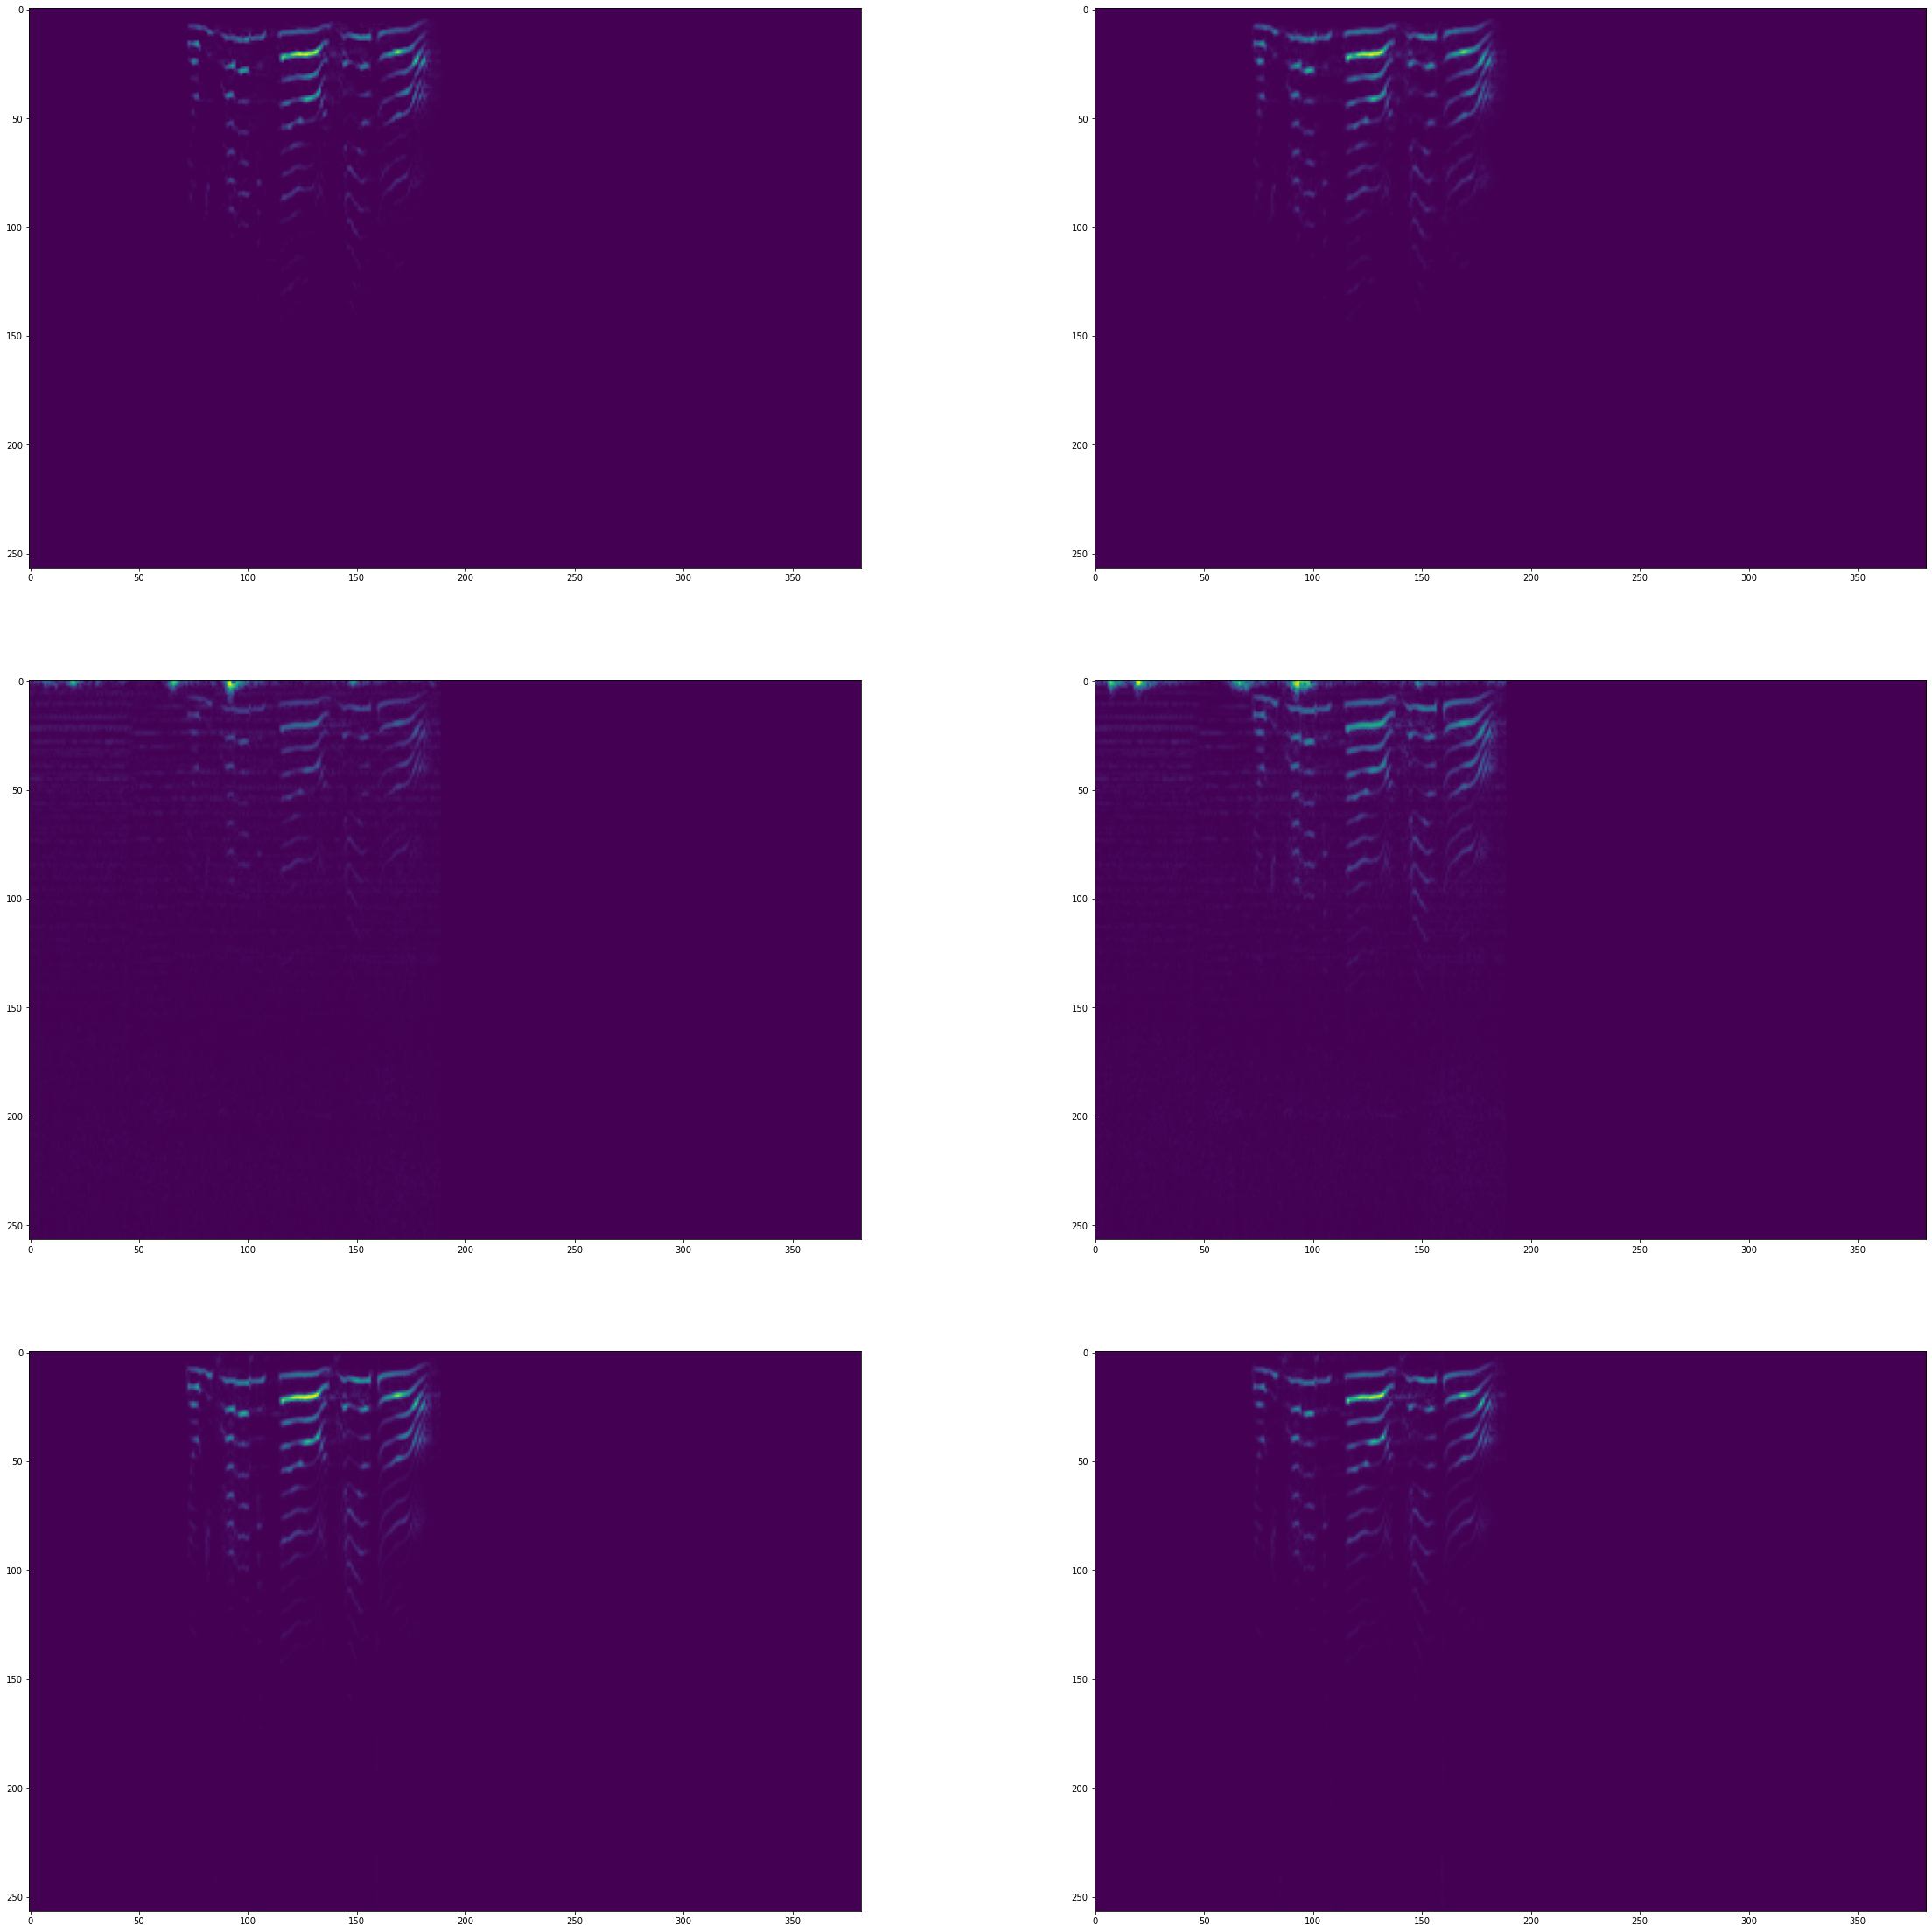

In [15]:
index = np.random.randint(0, 100)
print("Index : ", index)

fig = plt.figure(figsize=(40,40))

fig1 = fig.add_subplot(3, 2, 1)
fig1.imshow(outputs_test[index, 1])

fig2 = fig.add_subplot(3, 2, 2)
fig2.imshow(outputs_test[index, 0])

fig3 = fig.add_subplot(3, 2, 3)
fig3.imshow(inputs_test_1[index, 1])

fig4 = fig.add_subplot(3, 2, 4)
fig4.imshow(inputs_test_1[index, 0])

fig5 = fig.add_subplot(3, 2, 5)
fig5.imshow(cleans_test_1[index, 0])

fig6 = fig.add_subplot(3, 2, 6)
fig6.imshow(cleans_test_1[index, 1])

In [17]:
np.where(labels_test_1 == 10)

(array([ 23,  24,  31,  57,  70,  77,  81,  97, 193, 198]),)

Index :  193


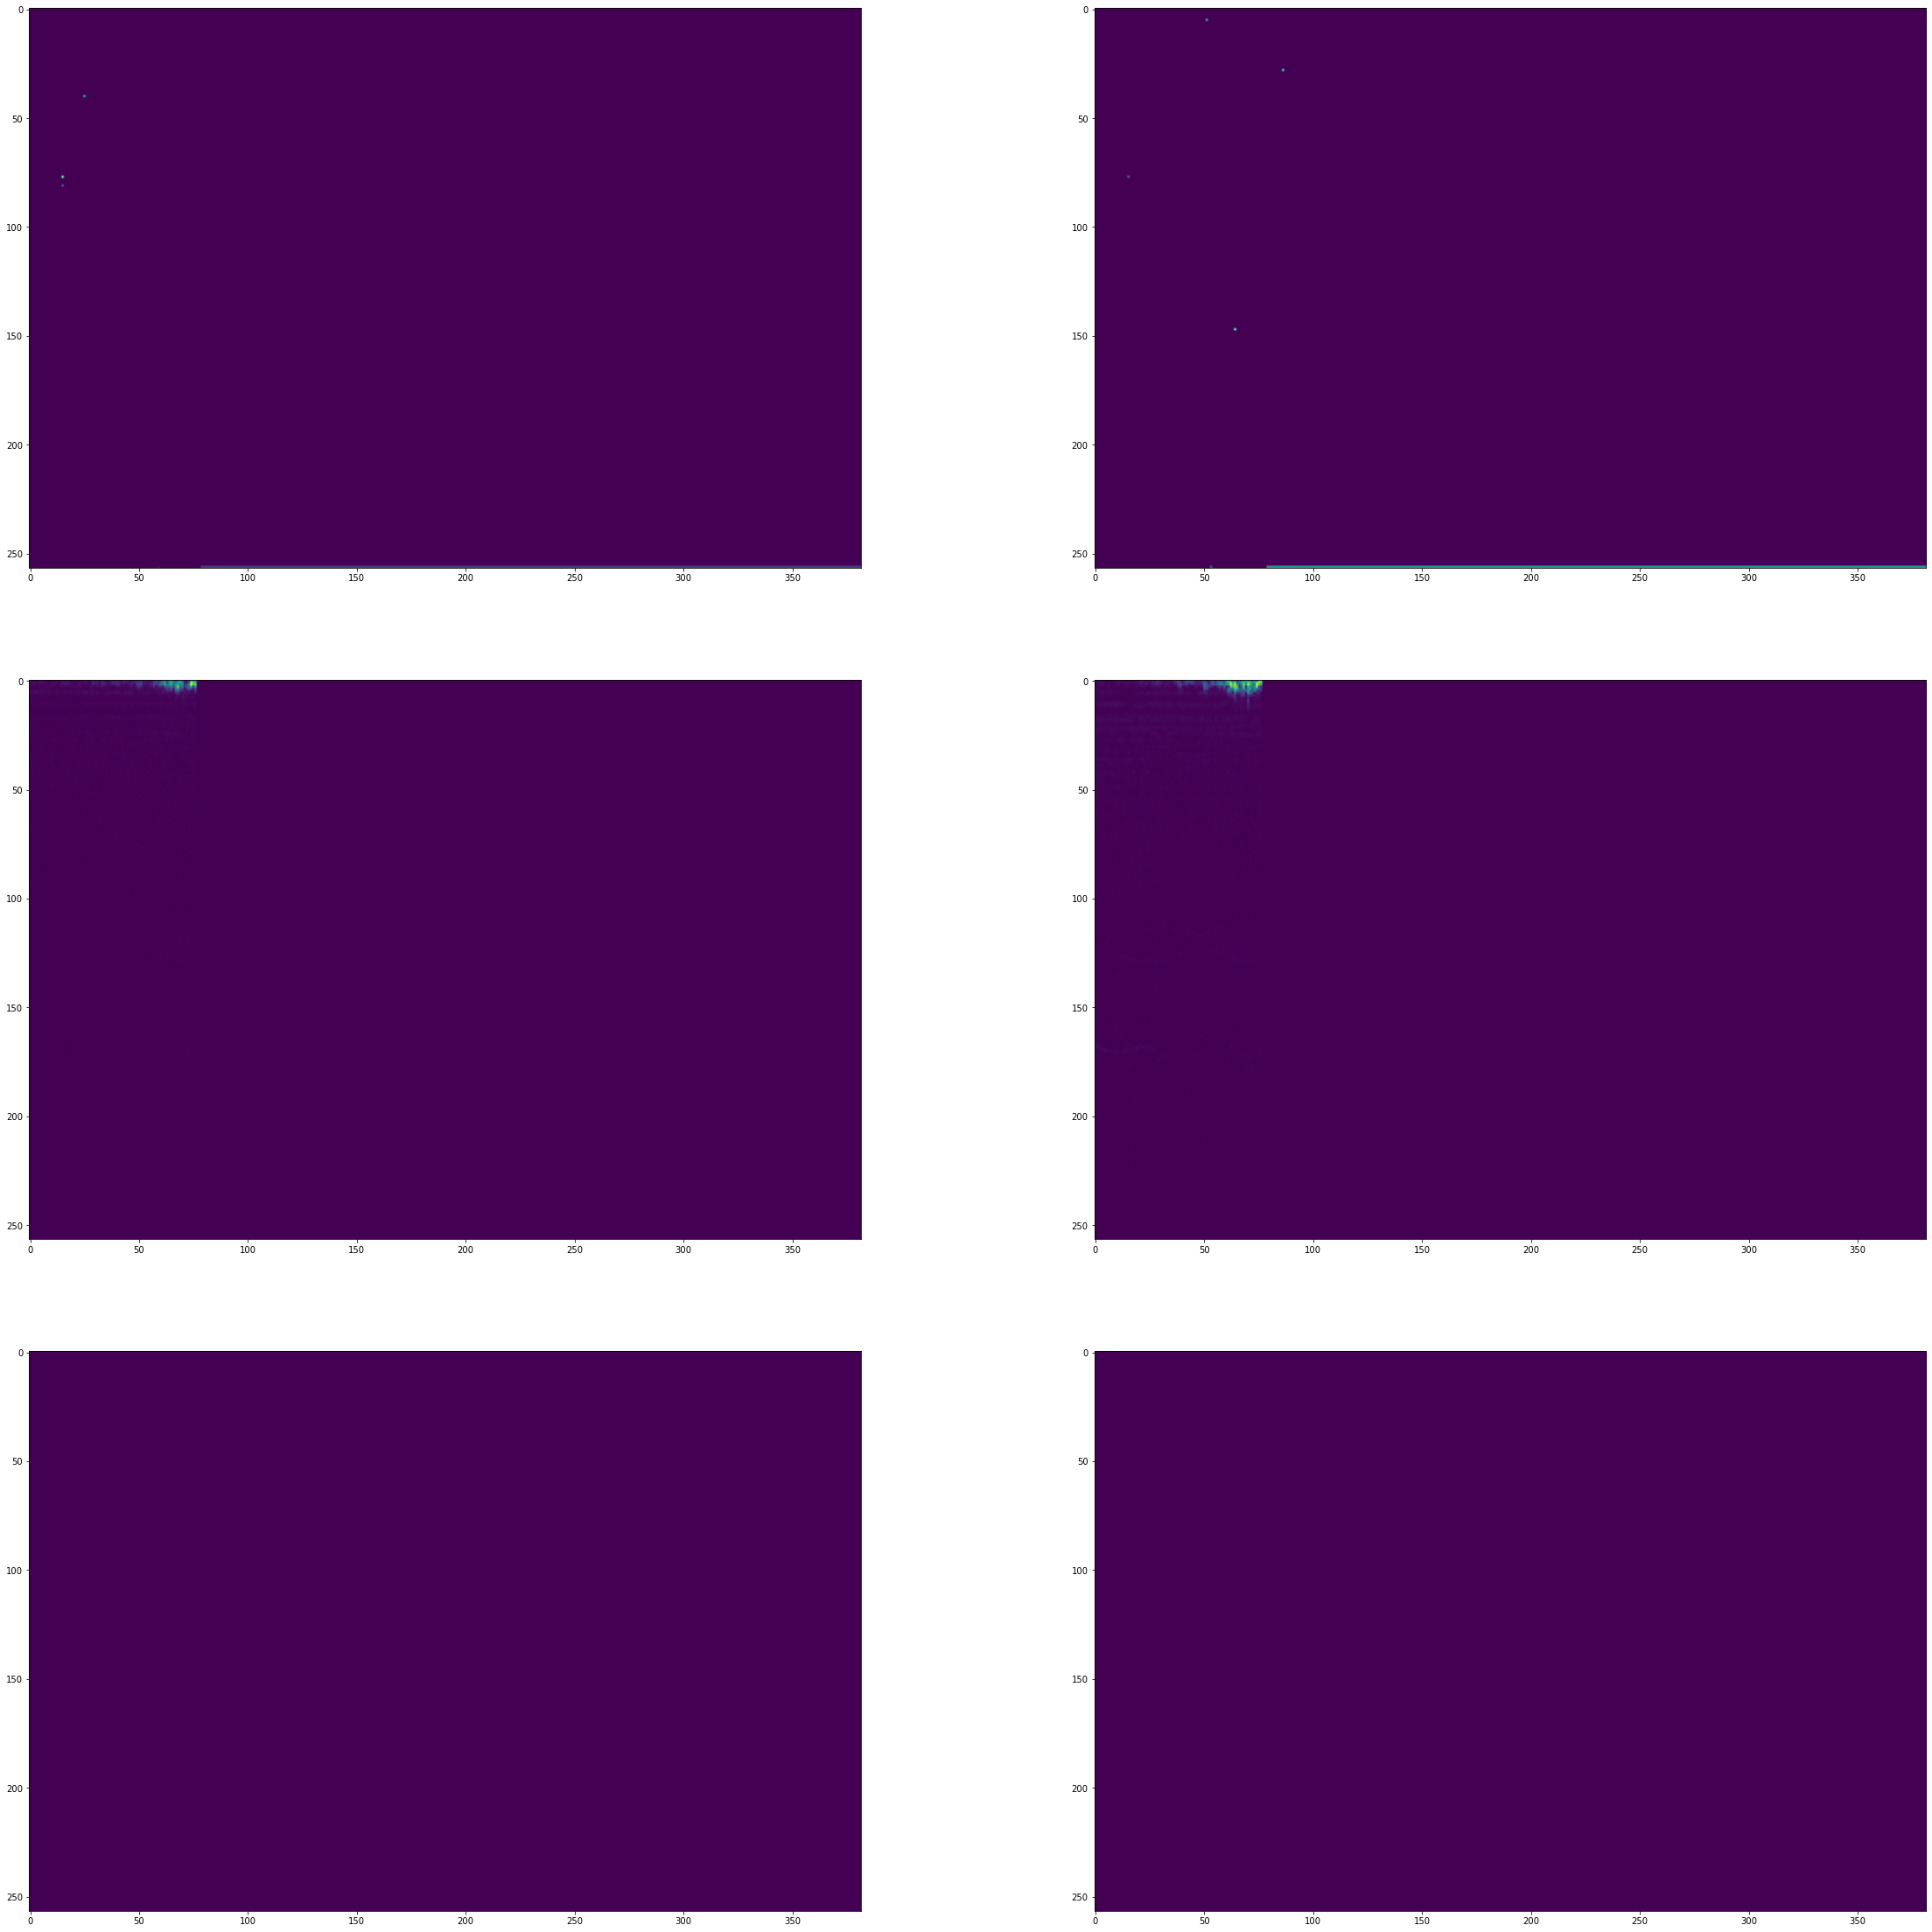

In [21]:
index = 193
print("Index : ", index)

fig = plt.figure(figsize=(40,40))

fig1 = fig.add_subplot(3, 2, 1)
fig1.imshow(outputs_test[index, 1])

fig2 = fig.add_subplot(3, 2, 2)
fig2.imshow(outputs_test[index, 0])

fig3 = fig.add_subplot(3, 2, 3)
fig3.imshow(inputs_test_1[index, 1])

fig4 = fig.add_subplot(3, 2, 4)
fig4.imshow(inputs_test_1[index, 0])

fig5 = fig.add_subplot(3, 2, 5)
fig5.imshow(cleans_test_1[index, 0])

fig6 = fig.add_subplot(3, 2, 6)
fig6.imshow(cleans_test_1[index, 1])

In [23]:
inputs_train_2 = dataset['inputs_train_2']
inputs_test_2  = dataset['inputs_test_2']
cleans_train_2 = dataset['cleans_train_2']
cleans_test_2  = dataset['cleans_test_2']

In [29]:
train_set_2  = AutoEncoder_dataset(inputs = inputs_train_2,
                                cleans = cleans_train_2)
test_set_2  = AutoEncoder_dataset(inputs = inputs_test_2,
                                cleans = cleans_test_2)

In [30]:
train_loader_2 = DataLoader(dataset=train_set_2,
                         batch_size=batch_size,
                         shuffle=False,
                         drop_last=False)
test_loader_2 = DataLoader(dataset=test_set_2,
                         batch_size=batch_size,
                         shuffle=False,
                         drop_last=False)

In [32]:
outputs_test_2 = torch.FloatTensor(1, 2, 257, 382)
outputs_train_2 = torch.FloatTensor(1, 2, 257, 382)

net.eval()

with torch.no_grad():
    for data in test_loader_2:
        inputs, _ = data
        inputs = inputs.to(device)
        outputs = net(inputs)
        outputs_test_2 = torch.cat((outputs_test_2, outputs.to('cpu')), 0)

    for data in train_loader_2:
        inputs, _ = data
        inputs = inputs.to(device)
        outputs = net(inputs)
        outputs_train_2 = torch.cat((outputs_train_2, outputs.to('cpu')), 0)

outputs_test_2 = outputs_test_2[1:].numpy()
outputs_train_2 = outputs_train_2[1:].numpy()

In [33]:
del inputs_test_1, inputs_test_2, inputs_train_2, cleans_test_1, cleans_train_2, cleans_test_2

In [34]:
labels_train_2 = dataset['labels_train_2']
labels_test_2  = dataset['labels_test_2']

In [35]:
print(outputs_train_2.shape)
print(labels_train_2.shape)
print(outputs_test_2.shape)
print(labels_test_2.shape)

(1800, 2, 257, 382)
(1800,)
(200, 2, 257, 382)
(200,)


In [36]:
np.savez_compressed('noise_removed_dataset',
                    inputs_train= outputs_train_2,
                    inputs_test = outputs_test_2,
                    labels_train= labels_train_2,
                    labels_test = labels_test_2)